In [2]:
# 1. Perhitungan Python Linear Regression
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('data/nilai.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.shape

(15, 2)

In [6]:
df.describe()

,Hours,Scores
count,15.000000,15.000000
mean,4.833333,48.066667
std,2.623429,25.327756
min,1.100000,17.000000
25%,2.950000,26.000000
50%,4.500000,42.000000
75%,6.800000,68.500000
max,9.200000,88.000000


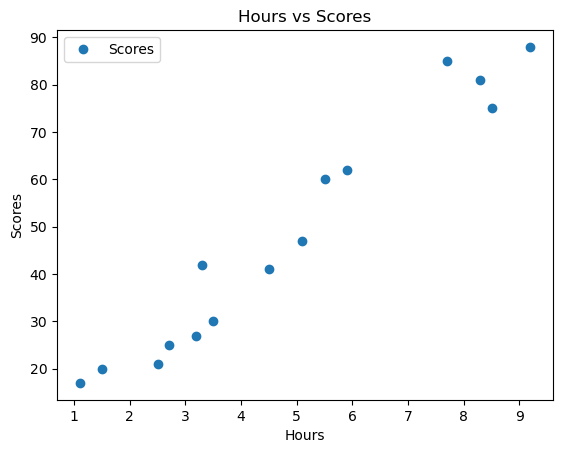

In [7]:
df.plot(x="Hours",y="Scores",style="o")
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

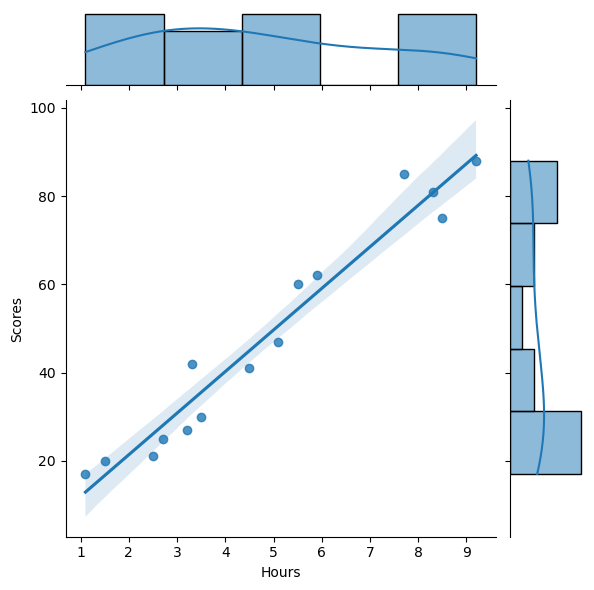

In [8]:
sns.jointplot(x=df['Hours'], y=df['Scores'], data=df, kind='reg')

In [9]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
print(regressor.intercept_)

2.3275200558074687


In [13]:
print(regressor.coef_)

[9.56051622]


In [14]:
y_pred = regressor.predict(X_test)

In [15]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,47,51.086153
1,88,90.284269
2,81,81.679805


In [16]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Model R^2 Square value', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 2.3500755726078375
Mean Squared Error: 7.458888326959005
Root Mean Squared Error: 2.731096542958342
Model R^2 Square value 0.9767394334918118


Text(0.5, 1.0, 'Linear Regression')

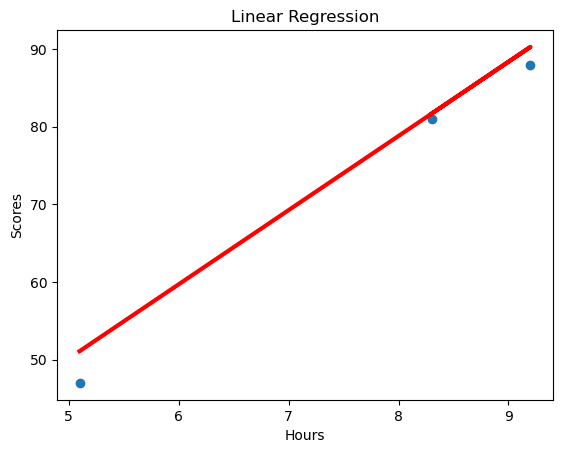

In [17]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Linear Regression')

Text(0, 0.5, 'Residual')

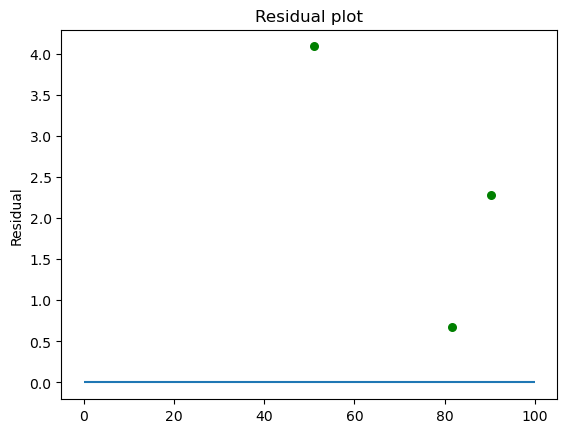

In [18]:
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test, c='g', s = 30)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')

In [19]:
# 2. Perhitungan Python Multiple Linear Regression
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [20]:
df = pd.read_csv("data/50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [21]:
X = df.iloc[:, :-1]
y = df.iloc[:, 4]

In [22]:
states=pd.get_dummies(X['State'],drop_first=True)
states.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [23]:
X=X.drop('State',axis=1)

In [24]:
X=pd.concat([X,states],axis=1)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = regressor.predict(X_test)

In [28]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
28,103282.38,103015.201598
11,144259.40,132582.277608
10,146121.95,132447.738452
41,77798.83,71976.098513
2,191050.39,178537.482211
27,105008.31,116161.242302
38,81229.06,67851.692097
31,97483.56,98791.733747
22,110352.25,113969.435330
4,166187.94,167921.065696


In [29]:
from sklearn import metrics
print('Model R^2 Square value', metrics.r2_score(y_test, y_pred))

Model R^2 Square value 0.9347068473282423


In [30]:
X_new = sm.add_constant(X)
X_opt = X_new.iloc[:, [0, 1, 2, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           1.34e-27
Time:                        03:52:34   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
R&D Spend           0.8060      0.046     17.369      0.000       0.712       0.900
Administration     -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing Spend     0.0270      0.017      1.574      0.123      -0.008       0.062
Florida           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
New York          -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
X_opt = X_new.iloc[:, [0, 1, 2, 3, 4]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           8.49e-29
Time:                        03:53:08   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
R&D Spend           0.8060      0.046     17.606      0.000       0.714       0.898
Administration     -0.0270      0.052     -0.523      0.604      -0.131       0.077
Marketing Spend     0.0270      0.017      1.592      0.118      -0.007       0.061
Florida           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
X_opt = X_new.iloc[:, [0, 1, 2, 3]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           4.53e-30
Time:                        03:53:44   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R&D Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
X_opt = X_new.iloc[:, [0, 1, 3]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           2.16e-31
Time:                        03:54:01   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
R&D Spend           0.7966      0.041     19.266      0.000       0.713       0.880
Marketing Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
X_opt = X_new.iloc[:, [0, 1]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           3.50e-32
Time:                        03:54:07   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
R&D Spend      0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
"""
1. Kelebihan linear regression
    a. mudah diterapkan dan dijelaskan hasil koefisiennya.
    b. ketika mengetahui adanya hubungan linear antara variable independen dan vairable dependennya, maka algoritma ini adalah
        yang terbaik untuk digunakan karena kompleksitasnya lebih sedikit dibandingkan dengan algoritma lain.
    c. algoritma ini memang rentan terhadap nilai outlier, namun dapat dihindari dengan standarisasi, teknik dimensionality
        reduction, teknik regularisasi atau cross validation.

2. kekurangan linear regression
    a. jika terdapat outlier dan gagal terdeteksi, maka dapat memiliki efek yang sangat besar pada regresi dan batas-batas
        linear dalam algoritma ini.
    b. algoritma ini tidak dapat menangkap seluruh variable independen yang mempengaruhi variable dependennya.
"""